In [16]:
# importing pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
import csv
import os
import numpy as np

In [17]:
# path to the client-hello-cipher-suites.csv file
# file_path = '../../../results/attributes/DNS/NEW_dns_transID_response_attributes.csv'
file_path = '../../../results/attributes/DNS/NEW_dns_domain_name_response_attributes.csv'

# path to the directory to save the plots
final_output_dir = '../../../results/attributes/DNS/domain_name_plots'

In [18]:
# df = pd.read_csv(file_path, sep='|')
# df.head()

In [19]:
import csv
csv.field_size_limit(10 * 1024 * 1024)

# Read the CSV file and extract data
device_transID = {}
with open(file_path, 'r') as csvfile:
    csvreader = csv.reader(csvfile)
    for i, row in enumerate(csvreader):
        # print(row)
        if i == 0:
            continue
        device = row[0].split('|')[0]
        # print(f'device: {device}')
        transIDs = row[0].split('|')[1].split('__')[1:]

        device_transID[device] = transIDs
        # print(f'devicess: {devices}')
            
        #     print(row[0])
        #     qnumber_dicts = row
            # continue

# device_transID['AwairAirQuality'] = ['0000']
# device_transID['LiFXBulb'] = ['0000']

for k, v in device_transID.items():
    print(f'key: {k}, value: {v}')

# # Create a dictionary to store qnumbers for each device
# device_qnumbers = {}
# for i, device_list in enumerate(devices):
#     for j, device in enumerate(device_list):
#         qnumber_dict = qnumber_dicts[i][j]
#         transaction_id = qnumber_dict['transaction id']
#         qnumbers = list(qnumber_dict.keys())
#         qnumbers.remove('transaction id')
        
#         if device not in device_qnumbers:
#             device_qnumbers[device] = []
#         device_qnumbers[device].extend(qnumbers)

# # Print the resulting dictionary
# for device, qnumbers in device_qnumbers.items():
#     print(f"Device: {device}, Qnumbers: {qnumbers}")


key: AwairAirQuality, value: ['04706f6f6c036e7470036f726700000100010000', '0a74696d65736572766572056177616972026973', '036f746105617761697202697300000100010000', '096d6573736167696e6705617761697202697300', '0361706905617761697202697300000100010000']
key: LiFXBulb, value: ['04706f6f6c036e7470036f726700000100010000', '0276320662726f6b6572046c69667802636f0000']
key: PixStarPhotoFrame, value: ['03617069087069782d7374617203636f6d00001c', '03617069087069782d7374617203636f6d012300', '03617069087069782d7374617203636f6d000001', '0573756e36690123000001000100000000000000', '03617069087069782d7374617203636f6d036c61', '03617069087069782d7374617203636f6d05776c', '0573756e3669036c616e00000100010000000000', '06697074696d65087069782d7374617203636f6d', '0573756e36690000010001000000000000000000', '0573756e3669012300001c000100000000000000', '0573756e366905776c616e300000010001000000', '0573756e366900001c0001000000000000000000', '0573756e366905776c616e3000001c0001000000', '0573756e3669036c616e00001c00010000

## Data Pre-Processing

In [20]:
def convert_bytes_to_domain_name(domain_bytes):
    domain_parts = []
    i = 0

    while i < len(domain_bytes):
        label_length = domain_bytes[i]
        if label_length == 0:
            break
        
        label = domain_bytes[i+1:i+1+label_length].decode('utf-8')
        domain_parts.append(label)
        i += label_length + 1

    return '.'.join(domain_parts)

In [21]:
for device, transID_list in device_transID.items():
    print(f'device: {device}')
    newList = []
    for i, transID in enumerate(transID_list):
        if transID == 'None' or transID == 'nan': continue
            
        # newList.append(new_val)  

        byte_literal = bytes.fromhex(transID)
        domain_name_string = convert_bytes_to_domain_name(byte_literal)
        # print("Domain Name:", domain_name_string)
        newList.append(domain_name_string)  
    
    # device_transID[device] = newList
    # device_transID[device] = sorted(newList)
    device_transID[device] = newList


# # Example hex transmit timestamp
# hex_timestamp = "dbd5ba43cb47498b"  # Replace with your hex value

# ntp_time = hex_to_ntp_timestamp(hex_timestamp)
# print("NTP Time:", ntp_time)
for k, v in device_transID.items():
    print(f'key: {k}, value: {v}')

device: AwairAirQuality
device: LiFXBulb
device: PixStarPhotoFrame
device: RingDoorBell
device: TPLinkCamera
key: AwairAirQuality, value: ['pool.ntp.org', 'timeserver.awair.is', 'ota.awair.is', 'messaging.awair.is', 'api.awair.is']
key: LiFXBulb, value: ['pool.ntp.org', 'v2.broker.lifx.co']
key: PixStarPhotoFrame, value: ['api.pix-star.com', 'api.pix-star.com.#', 'api.pix-star.com', 'sun6i.#', 'api.pix-star.com.la', 'api.pix-star.com.wl', 'sun6i.lan', 'iptime.pix-star.com', 'sun6i', 'sun6i.#', 'sun6i.wlan0', 'sun6i', 'sun6i.wlan0', 'sun6i.lan', 'sun6i.wlan0', 'sun6i.#', 'FAEJFICNFDFEEBFCCND', 'sun6i', 'sun6i.#']
key: RingDoorBell, value: ['fw.ring.com', 'fw.ring.com', 'fw.ring.com', 'fw.ring.com', 'fw.ring.com', 'fw.ring.com', 'fw.ring.com', 'fw.ring.com', 'fw.ring.com', 'fw.ring.com', 'fw.ring.com', 'fw.ring.com', 'fw.ring.com', 'fw.ring.com', '2.pool.ntp.org', 'fw.ring.com', 'fw.ring.com', 'fw.ring.com', 'fw.ring.com', 'fw.ring.com', 'fw.ring.com', 'fw.ring.com', 'fw.ring.com', 'fw.r

## Plotting

In [22]:
def plot_list_as_line_plt(lst2D, save_name):
    x_values = 0
    # for i, cs in enumerate(lst2D):
    # if len(cs) <= 1:
        # print(f'case')
        # continue
        # return
    # x_values = list(range(len(lst2D)))  # Use list indices as x-axis
    # x_values = [x + 1 for x in x_values]
    y_values = lst2D  # Use list items as y-axis
    
    # general config for plots with more than 1 graph
    # if i==0:
    #     linstl = '-'
    #     mkr = 'o'
    #     clr = 'b'
    # if i==1:
    #     linstl = ':'
    #     mkr = '*'
    #     clr = 'y'
        
    # # specific configs for required devices
    # if save_name == 'LiFXBulb':  # LiFXBulb
    #     linstl = '--'
    #     mkr = '^'
    #     clr = 'c'
    # elif save_name == 'TPLinkCamera':  # TPLinkCamera
    #     linstl = '-.'
    #     mkr = 'x'
    #     clr = 'r'

    # linstl = '-'
    # mkr = '.'
    # clr = 'b'
    # ssiizzee = 2
    # if save_name == 'RingDoorBell' or save_name == 'TPLinkCamera' or save_name == 'TribySpeaker':
    #     ssiizzee = 20
    # plt.plot(x_values, y_values, marker=mkr, linestyle=linstl, color=clr)
    # plt.scatter(x_values, y_values, color=clr, marker=mkr, label='Data Points', s=ssiizzee)


    ###################################################################################################
    # HIST
    # n, bins, _ = plt.hist(y_values, bins=20, density=True, edgecolor='black')
    # print(f'n: {n}')
    # print(f'sum(n): {sum(n)*20}')
    # print(f'bins: {bins}')

    binss = range(0, 20, 1)
    # Create a histogram with probabilities
    n, bins, _ = plt.hist(y_values, bins=binss, density=True, alpha=0.7)

    # Calculate bin widths
    bin_widths = bins[1] - bins[0]

    # Calculate relative frequencies (probabilities) for each bin
    probabilities = n * bin_widths

    # Plot the histogram with probabilities
    plt.clf()  # Clear previous plot
    plt.bar(bins[:-1], probabilities, width=bin_widths, align='edge', alpha=0.7)
    print(f'bins: {bins}')
    print(f'n: {n}')

    ###################################################################################################
    
    plt.xlabel('Order')
    plt.ylabel('Transmit timestamp')
    # plt.title('Line Plot from List')
    plt.grid(True)

    # x_values = np.array(x_values)
    # even_xticks = x_values[x_values % 1000 == 0]  # to get the x-axis grid lines
    # plt.xticks(even_xticks)
    
    # if len(x_values) <= 25:
    #     plt.xticks(range(len(x_values)), [int(x) for x in x_values])
    # elif len(x_values) <= 50:
    #     x_values = np.array(x_values)
    #     even_xticks = x_values[x_values % 2 == 0]  # to get the x-axis grid lines
    #     plt.xticks(even_xticks)
    # elif len(x_values) <= 75:
    #     x_values = np.array(x_values)
    #     even_xticks = x_values[x_values % 3 == 0]  # to get the x-axis grid lines
    #     plt.xticks(even_xticks)
    # elif len(x_values) <= 100:
    #     x_values = np.array(x_values)
    #     even_xticks = x_values[x_values % 5 == 0]  # to get the x-axis grid lines
    #     plt.xticks(even_xticks)

    plt.savefig(os.path.join(final_output_dir, save_name), format='pdf')  # save
    plt.show()

# def plot_list_as_line_sns(lst2D, save_name):
#     x_values = list(range(len(lst)))  # Use list indices as x-axis
#     y_values = lst  # Use list items as y-axis

#     sns.lineplot(x=x_values, y=y_values, marker='o', color='b')
#     plt.xlabel('Index')
#     plt.ylabel('Value')
#     plt.title('Line Plot from List')
#     plt.grid(True)

#     plt.savefig(os.path.join(final_output_dir, save_name), format='pdf')  # save
#     plt.show()


device: AwairAirQuality, len(css): 5
device: LiFXBulb, len(css): 2
device: PixStarPhotoFrame, len(css): 19
device: RingDoorBell, len(css): 313
device: TPLinkCamera, len(css): 5


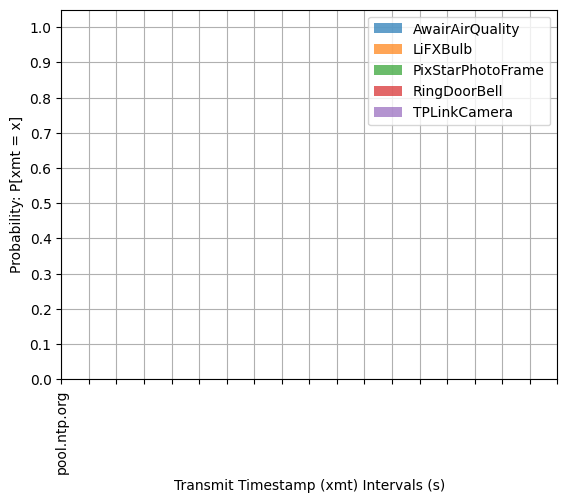

In [23]:
device_g01 = ['AwairAirQuality', 'LiFXBulb', 'PixStarPhotoFrame', 'RingDoorBell', 'TPLinkCamera', 'TribySpeaker', 'AmazonEcho', 'WithingsSleepSensor', 'SamsungCamera', 'WithingsBabyMonitor']

# binss0 = range(0, 150000, 1000)
# binss1 = range(0, 90000, 1000)
# binss2 = range(0, 20000, 500)
# binss3 = range(0, 1000, 100)
# binss4 = range(0, 100, 1)

binsss = range(0, 20, 1)

for device, css in device_transID.items():
    if device not in device_g01:
        continue
    print(f'device: {device}, len(css): {len(css)}')

    device_name = device
    # if '/' in device:
    #     device_name = device.split('/')[0]

    # if device_name in printed_devices:
    #     continue  
    # print(f'device_name: {device_name}')

    clean_data = css
    # clean_data = remove_outliers(css, 0)

    # Create a histogram with probabilities
    n, bins, _ = plt.hist(clean_data, bins=binsss, density=True, alpha=0.7)

    # Calculate bin widths
    bin_widths = bins[1] - bins[0]

    # Calculate relative frequencies (probabilities) for each bin
    probabilities = n * bin_widths

    # Plot the histogram with probabilities
    # plt.clf()  # Clear previous plot
    # if device == 'AwairAirQuality':
    #     labell = 'Awair air quality'
    # elif device == 'TPLinkCamera':
    #     labell = 'TPLink camera'
    # elif device == 'AmazonEcho':
    #     labell = 'Amazon Echo'
    # elif device == 'SamsungCamera':
    #     labell = 'Samsung camera'
    plt.bar(bins[:-1], probabilities, width=bin_widths, align='edge', alpha=0.7, label=device)  # TODO: change the label for selected devices

    # break


plt.xticks(range(0, 90001, 5000), rotation='vertical')
plt.xlim(0, 90000)

plt.yticks([0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1])

plt.xlabel('Transmit Timestamp (xmt) Intervals (s)')
plt.ylabel('Probability: P[xmt = x]')
# plt.title('Line Plot from List')
plt.grid(True)
plt.legend()

plt.savefig(os.path.join(final_output_dir, 'delta_transmit_timestamp.pdf'), format='pdf')  # save
plt.show()



len of css: 5, len of clean_data: 5
percentage remaining: 100.0%
device: AwairAirQuality, clean_data: ['pool.ntp.org', 'timeserver.awair.is', 'ota.awair.is', 'messaging.awair.is', 'api.awair.is']
bins: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19.]
n: [0.2 0.2 0.2 0.2 0.2 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0. ]


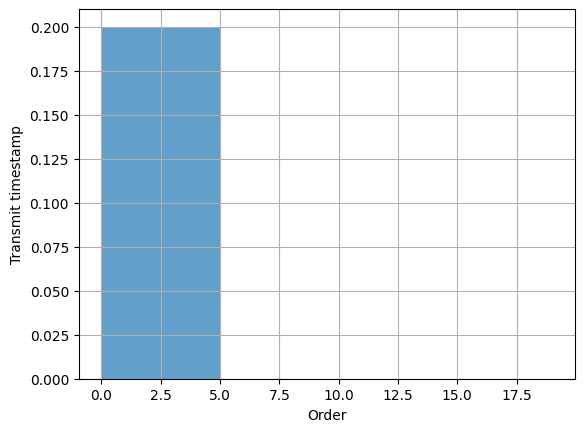

len of css: 2, len of clean_data: 2
percentage remaining: 100.0%
device: LiFXBulb, clean_data: ['pool.ntp.org', 'v2.broker.lifx.co']
bins: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19.]
n: [0.5 0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0. ]


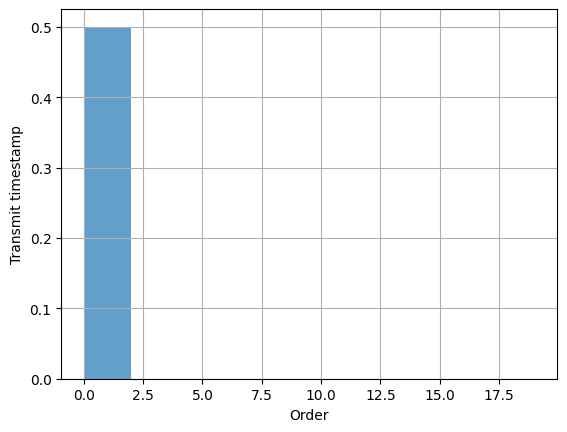

len of css: 19, len of clean_data: 19
percentage remaining: 100.0%
device: PixStarPhotoFrame, clean_data: ['api.pix-star.com', 'api.pix-star.com.#', 'api.pix-star.com', 'sun6i.#', 'api.pix-star.com.la', 'api.pix-star.com.wl', 'sun6i.lan', 'iptime.pix-star.com', 'sun6i', 'sun6i.#', 'sun6i.wlan0', 'sun6i', 'sun6i.wlan0', 'sun6i.lan', 'sun6i.wlan0', 'sun6i.#', 'FAEJFICNFDFEEBFCCND', 'sun6i', 'sun6i.#']
bins: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19.]
n: [0.10526316 0.05263158 0.21052632 0.05263158 0.05263158 0.10526316
 0.05263158 0.15789474 0.15789474 0.05263158 0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


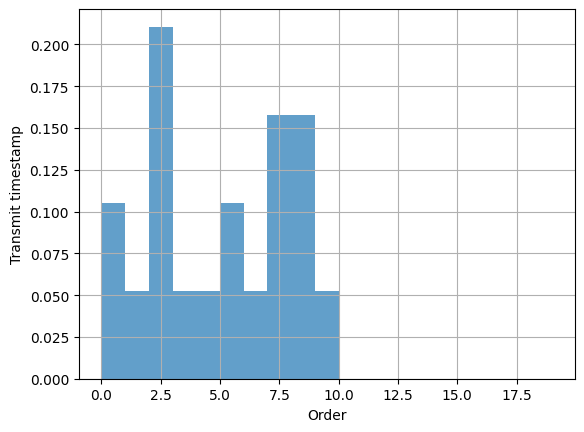

len of css: 313, len of clean_data: 313
percentage remaining: 100.0%
device: RingDoorBell, clean_data: ['fw.ring.com', 'fw.ring.com', 'fw.ring.com', 'fw.ring.com', 'fw.ring.com', 'fw.ring.com', 'fw.ring.com', 'fw.ring.com', 'fw.ring.com', 'fw.ring.com', 'fw.ring.com', 'fw.ring.com', 'fw.ring.com', 'fw.ring.com', '2.pool.ntp.org', 'fw.ring.com', 'fw.ring.com', 'fw.ring.com', 'fw.ring.com', 'fw.ring.com', 'fw.ring.com', 'fw.ring.com', 'fw.ring.com', 'fw.ring.com', 'fw.ring.com', 'fw.ring.com', 'fw.ring.com', 'fw.ring.com', 'fw.ring.com', 'fw.ring.com', 'fw.ring.com', 'fw.ring.com', 'fw.ring.com', 'fw.ring.com', 'fw.ring.com', 'fw.ring.com', 'fw.ring.com', 'fw.ring.com', 'fw.ring.com', 'fw.ring.com', 'fw.ring.com', 'fw.ring.com', 'fw.ring.com', 'fw.ring.com', 'fw.ring.com', 'fw.ring.com', 'fw.ring.com', 'fw.ring.com', 'fw.ring.com', 'fw.ring.com', 'fw.ring.com', 'fw.ring.com', 'fw.ring.com', 'fw.ring.com', 'fw.ring.com', 'fw.ring.com', 'fw.ring.com', 'fw.ring.com', 'fw.ring.com', 'fw.ring

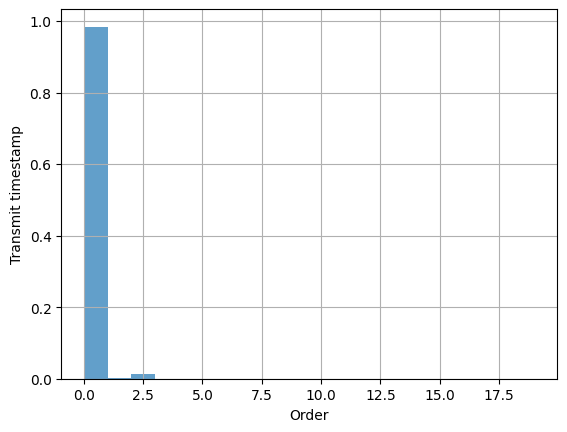

len of css: 5, len of clean_data: 5
percentage remaining: 100.0%
device: TPLinkCamera, clean_data: ['aps1-relay.tplinkcl', 'sg-stun.tplinkcloud', 'devs.tplinkcloud.co', '0.pool.ntp.org', 'ipc.tplinkcloud.com']
bins: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19.]
n: [0.2 0.2 0.2 0.2 0.2 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0. ]


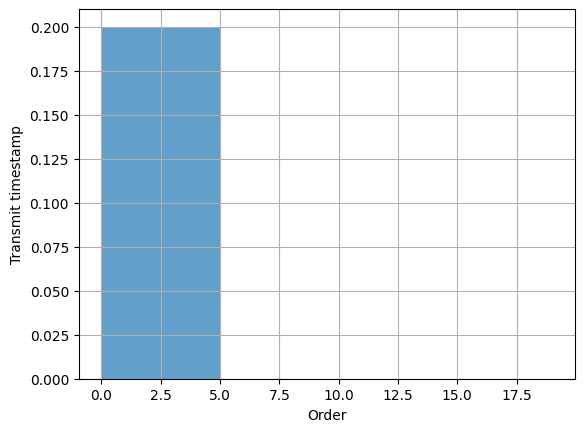

In [24]:
# plot_list_as_line_plt(dict01['AwairAirQuality'][0])
# plot_list_as_line_sns(dict01['AwairAirQuality'][0])
printed_devices = []
for device, css in device_transID.items():
    device_name = device
    # if '/' in device:
    #     device_name = device.split('/')[0]

    # if device_name in printed_devices:
    #     continue  
    # print(f'device_name: {device_name}')

    clean_data = css
    # clean_data = remove_outliers(css, 0)

    print(f'len of css: {len(css)}, len of clean_data: {len(clean_data)}')
    print(f'percentage remaining: {(len(clean_data)/len(css))*100}%')
    print(f'device: {device}, clean_data: {clean_data}')
    plot_list_as_line_plt(clean_data, device_name)
    printed_devices.append(device_name)
    # if len(css) < 1:
    #     print(f'device: {device} has 0 ciphersuites')
    #     continue
    # for csi, cs in enumerate(css):
    #     if len(cs) <= 1:
    #         print(f'device: {device}, cs: {csi} has 0 ciphers')
    #         continue
    #     if device_name in printed_devices:
    #         continue
    #     plot_list_as_line_plt(cs, device_name)
    #     printed_devices.append(device_name)

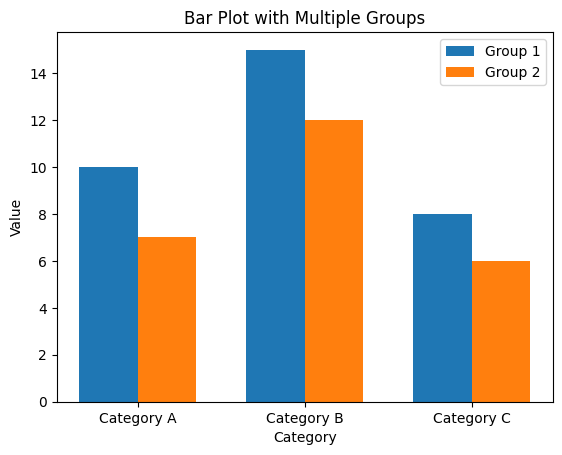

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
categories = ['Category A', 'Category B', 'Category C']
values_group1 = [10, 15, 8]
values_group2 = [7, 12, 6]

# Create x positions for the bars
x = np.arange(len(categories))

# Create a figure and axis
fig, ax = plt.subplots()

# Create bar plots for each group
bar_width = 0.35
bar1 = ax.bar(x - bar_width/2, values_group1, bar_width, label='Group 1')
bar2 = ax.bar(x + bar_width/2, values_group2, bar_width, label='Group 2')

# Set labels, title, and ticks
ax.set_xlabel('Category')
ax.set_ylabel('Value')
ax.set_title('Bar Plot with Multiple Groups')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

# Display the plot
plt.show()
